In [1]:
import numpy as np
import uproot as up
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.mlab as mlab
from scipy.stats import norm
import pylandau
from time_res_util import process_times,get_all_times
import os
import time

#### Set any parameters here to select the root file and prepare the plots

In [2]:
# particle = "pi"
particle = "mu"
length = "1.5"
length_dict = {
    "2.5" : "2_5",
    "2" : "2",
    "1.5" : "1_5"
}
color_dict = {
    "pi" : "green",
    "mu" : "blue"
}

#### Next, open the root file with uproot and save the times to a Numpy Array and call the process function

In [13]:
#Minimum number of pixels to be hit for us to accept event
threshold = 10

uproot_path = f"/cwork/rck32/eic/work_eic/root_files/August_1/run_1cm_optph/mu_5GeV_500_0.edm4hep.root:events"
# uproot_path = f"/cwork/rck32/eic/work_eic/root_files/August_1/run_1cm_optph/"
accepted_times, second_lowest_list, avg_accepted_times = process_times(uproot_path, threshold,False)

total: 41974 | duplicates: 2695 | ratio: 0.06420641349406776 | num unique cells hit: 2621 | skipped: 0


In [14]:
flattened_times = get_all_times(uproot_path,multipleFiles = False)

#### We can plot the times in a histogram to visualize the result

#### Now we need to calculate the standard deviation and mean of this distribution

In [16]:
use_avg = False

resolution (sigma): 0.130 | mean: 4.63 | FWHM: 0.305


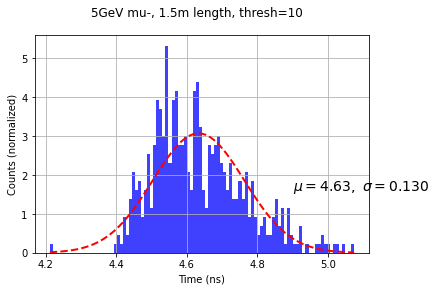

In [17]:
# plot_times = avg_accepted_times if use_avg else accepted_times
plot_times = second_lowest_list

fig, axs = plot.subplots(1, 1)

(mu, sigma) = norm.fit(plot_times)
n, bins, patches = plot.hist(plot_times, 100, facecolor=color_dict[particle], alpha=0.75,density=True)
fig.suptitle(f"5GeV {particle}-, {length}m length, thresh={threshold}")

y = norm.pdf( bins, mu, sigma)
l = axs.plot(bins, y, 'r--', linewidth=2)
axs.set_xlabel('Time (ns)')
axs.set_ylabel('Counts (normalized)')
axs.grid(True)
axs.text(4.9,1.6,r'$\mu=%4.2f,\ \sigma=%4.3f$'%(mu,sigma),fontsize=14)

fig.show()
extra_str = "_avg" if use_avg else ""
# fig.savefig(f"plots/time_res/July_31/one_bar_optph_1cm_time_res.jpeg")
print("resolution (sigma): %4.3f | mean: %4.2f | FWHM: %4.3f" %(sigma,mu,(2.35 * sigma)))